In [1]:
import os
import glob
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

cameras = [
    ["CAM02009CCTV7.jpg", 
     "I-80 Eastbound Exit 161 Bellefonte Interchange (I-80 & I-99)","no change",40.944571,-77.720918],
    ["CAM02001CCTV2.jpg", 
     "Port Matilda US-322 By-Pass Westbound","changed 4/27",40.810961,-78.075259],
    ["CAM02010CCTV11.jpg", 
     "Port Matilda I-99 Exit 61 Median","no change",40.803880,-78.063664],
    ["CAM02005CCTV9.jpg", 
     "Milesburg Interchange West I-80 Exit 158 Eastbound / Alt US-220","no change",40.955477,-77.773749],
    ["CAM02006CCTV10.jpg", 
     "Milesburg Interchange East I-80 Exit 158 Westbound / PA-150","changed 4/27",40.956061,-77.766277],
    ["CAM02028CCTV32.jpg",
     "Atherton and Valley Vista","no change",40.812073,-77.922500],
    ["CAM02037CCTV43.jpg",
     "Atherton and Vairo","no change",40.807936,-77.895204],
    ["CAM02038CCTV44.jpg",
     "Atherton and North Hills","no change",40.805031,-77.886886],
    ["CAM02039CCTV45.jpg",
     "Atherton and Park","no change",40.796522,-77.872549],
    ["CAM02040CCTV46.jpg",
     "Atherton and W.College","changed 5/2",40.791787,-77.864971],
    ["CAM02042CCTV49.jpg",
     "Atherton and W.Beaver","changed 5/2-5/4, then returned",40.790894,-77.863812],
    ["CAM02003CCTV4.jpg",
     "I-99/US-322 Interchange","changed 5/1",40.828613,-77.840339],
    ["CAM02020CCTV24.jpg",
     "Benner Pike","changed 5/6-5/7, then returned",40.829048,-77.804817],
    ["CAM02002CCTV3.jpg",
     "Grays Woods","changed 5/3",40.817144,-77.939841],
    ["CAM02007CCTV13.jpg",
     "US-322 E/O PA-26","changed 5/4",40.795773,-77.820937],
    ["CAM02046CCTV52.jpg",
     "I-99 at Exit 71 (Toftrees)","changed 5/5",40.817953,-77.900271],
    ["CAM02033CCTV38.jpg",
     "Snowshoe I-80 Exit 147","no change",41.022703,-77.933981],
    ["collegeTwp.jpg",
     "College Township Traffic camera","no change",40.811564,-77.830719],
    ["parkArboretum.jpg",
     "PSU Park Ave.","no change",40.804483,-77.864219]
    ]

camdfs = pd.DataFrame(cameras,columns = ['ID','Description','status','Latitude','Longitude'])
camdfs[['ID','Description','status']]

,ID,Description,status
0,CAM02009CCTV7.jpg,I-80 Eastbound Exit 161 Bellefonte Interchange...,no change
1,CAM02001CCTV2.jpg,Port Matilda US-322 By-Pass Westbound,changed 4/27
2,CAM02010CCTV11.jpg,Port Matilda I-99 Exit 61 Median,no change
3,CAM02005CCTV9.jpg,Milesburg Interchange West I-80 Exit 158 Eastb...,no change
4,CAM02006CCTV10.jpg,Milesburg Interchange East I-80 Exit 158 Westb...,changed 4/27
5,CAM02028CCTV32.jpg,Atherton and Valley Vista,no change
6,CAM02037CCTV43.jpg,Atherton and Vairo,no change
7,CAM02038CCTV44.jpg,Atherton and North Hills,no change
8,CAM02039CCTV45.jpg,Atherton and Park,no change
9,CAM02040CCTV46.jpg,Atherton and W.College,changed 5/2


In [3]:
# Loading all camera data...

#xdf = pd.read_csv("/home/ubuntu/nitelite/full_vehicles_427-615-partial-all-cameras.csv")
xdf = pd.read_csv("allcams1120.csv")
xdf['datetime_EST'] = pd.to_datetime(xdf['datetime_EST'])
xdf.sort_values(by='datetime_EST')



,datetime_UTC,image_file,vehicle_count,datetime_EST,camera_name
0,2020-04-27 00:00:02,/home/ubuntu/cams1/20200427_000002_CAM02033CCT...,0,2020-04-26 20:00:02,CAM02033CCTV38
1,2020-04-27 00:00:05,/home/ubuntu/cams1/20200427_000005_collegeTwp.jpg,2,2020-04-26 20:00:05,collegeTwp
2,2020-04-27 00:00:08,/home/ubuntu/cams1/20200427_000008_CAM02028CCT...,1,2020-04-26 20:00:08,CAM02028CCTV32
3,2020-04-27 00:00:10,/home/ubuntu/cams1/20200427_000010_CAM02037CCT...,3,2020-04-26 20:00:10,CAM02037CCTV43
4,2020-04-27 00:00:12,/home/ubuntu/cams1/20200427_000012_CAM02038CCT...,0,2020-04-26 20:00:12,CAM02038CCTV44
...,...,...,...,...,...
7529106,2020-11-20 14:57:19,/home/ubuntu/cams37/CAM02005CCTV9/20201120/202...,0,2020-11-20 10:57:19,CAM02005CCTV9
7529107,2020-11-20 14:57:21,/home/ubuntu/cams37/CAM02006CCTV10/20201120/20...,0,2020-11-20 10:57:21,CAM02006CCTV10
7529108,2020-11-20 14:57:25,/home/ubuntu/cams37/collegeTwp/20201120/202011...,3,2020-11-20 10:57:25,collegeTwp
7529109,2020-11-20 14:57:30,/home/ubuntu/cams37/CAM02037CCTV43/20201120/20...,0,2020-11-20 10:57:30,CAM02037CCTV43


In [4]:
icdf = xdf.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdf.camera_name]).size().reset_index(name='image_count')
icdfs = icdf.groupby(['datetime_EST'])['image_count'].sum().reset_index(name='image_sum')
icdfcvc = xdf.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdf.camera_name])['vehicle_count'].sum().reset_index(name='vehicle_count_sum')
icdfcvc['image_count'] = icdf["image_count"]

In [5]:
def get_vcc_avg(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.vehicle_count_sum) / (float(row.image_count)/60.0))
    return(rv)

def get_vcc_avg_daily(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.vehicle_count_sum) / (float(row.image_count)/(24.0 * 60.0)))
    return(rv)

def get_vcc_avg_weekly(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.vehicle_count_sum) / (float(row.image_count)/(24.0 * 7.0 * 60.0)))
    return(rv)  

In [6]:
icdfcvc['vehicle_avg'] = icdfcvc.apply(get_vcc_avg, axis=1)

In [7]:
icdfcvc.to_csv("vehicle_avg_per_hour_each_camera_427-1120.csv",index=False)

In [8]:
# drop frozen images from Benner Pike
# jun 3 12:05:14 jun 5 21:01:59
xdfn = xdf.drop(xdf[(xdf["camera_name"] == "CAM02020CCTV24") & (xdf['datetime_EST'] > '2020-6-3 12:05:14') & (xdf['datetime_EST'] <= '2020-6-5 21:01:59') ].index)

# jun 3 12:05:14 jun 5 21:01:59
xdfn1 = xdfn.drop(xdfn[(xdfn["camera_name"] == "CAM02020CCTV24") & (xdfn['datetime_EST'] > '2020-6-22 12:05:00') & (xdfn['datetime_EST'] <= '2020-6-23 15:50:00') ].index)

xdfn2 = xdfn1#.drop(xdfn1[(xdfn1["camera_name"] == "CAM02020CCTV24") & (xdfn1['datetime_EST'] > '2020-6-28 14:06:00') ].index)

# drop frozen images from Bellefonte exchange:
#(fdft['datetime_EST'] > '2020-8-18 12:04:00') & (fdft['datetime_EST'] < '2020-8-19 16:03:00')
xdfn3 = xdfn2.drop(xdfn2[(xdfn2["camera_name"] == "CAM02009CCTV7") & (xdfn2['datetime_EST'] > '2020-8-18 12:04:00') & (xdfn2['datetime_EST'] < '2020-8-19 16:03:00') ].index)

xdfn4 = xdfn3.drop(xdfn3[(xdfn3['datetime_EST'] > '2020-9-12 18:00:00') & (xdfn3['datetime_EST'] < '2020-9-13 13:00:00') ].index)

xdfn5 = xdfn4.drop(xdfn4[(xdfn4["camera_name"] == "CAM02020CCTV24") & (xdfn4['datetime_EST'] > '2020-10-10 12:00:00')].index)


In [9]:
icdf = xdfn5.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdfn5.camera_name]).size().reset_index(name='image_count')
icdfs = icdf.groupby(['datetime_EST'])['image_count'].sum().reset_index(name='image_sum')
icdfcvc = xdfn5.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdfn5.camera_name])['vehicle_count'].sum().reset_index(name='vehicle_count_sum')
icdfcvc['image_count'] = icdf["image_count"]
icdfcvc['vehicle_avg'] = icdfcvc.apply(get_vcc_avg, axis=1)

In [10]:
#xdf.set_index('datetime_EST', drop=False, inplace=True)
#df_sampledh = xdf.set_index('datetime_EST').resample('H').sum().reset_index()

xdfn5.set_index('datetime_EST', drop=False, inplace=True)
df_sampledh = xdfn5.set_index('datetime_EST').resample('H').sum().reset_index()

In [11]:
merged = df_sampledh.merge(icdfs, on='datetime_EST')

In [12]:
df_sampledh = merged

In [13]:
def get_vc_avg(row):
    rv = 0.0
    if row.image_sum > 0:
        rv = (float(row.vehicle_count) / (float(row.image_sum)/(19.0 * 60.0)))
    return rv   



In [14]:
df_sampledh['vehicle_avg'] = df_sampledh.apply(get_vc_avg, axis=1)

In [15]:
df_sampledh.to_csv("vehicle_avg_per_hour_all_cameras_427-1120.csv",index=False)

In [16]:
#df_sampledh = pd.read_csv("vehicle_avg_per_hour_all_cameras_427-1110.csv")

In [17]:
def h2i (row):
    return int((row['datetime_EST']).strftime('%H'))

def date2day (row):
    return (row['datetime_EST']).dayofweek

In [18]:
#df_sampledh['Dates'] = pd.to_datetime(df_sampledh['datetime_EST']).dt.date
#df_sampledh['Time'] = pd.to_datetime(df_sampledh['datetime_EST']).dt.time
df_sampledh['ti'] = df_sampledh.apply (lambda row: h2i(row), axis=1)
df_sampledh['dy'] = df_sampledh.apply (lambda row: date2day(row), axis=1)


In [19]:
df_sampledh

,datetime_EST,vehicle_count,image_sum,vehicle_avg,ti,dy
0,2020-04-26 20:00:00,144,960,171.000000,20,6
1,2020-04-26 21:00:00,0,68,0.000000,21,6
2,2020-04-26 22:00:00,11,516,24.302326,22,6
3,2020-04-26 23:00:00,38,794,54.559194,23,6
4,2020-04-27 00:00:00,77,796,110.276382,0,0
...,...,...,...,...,...,...
4957,2020-11-20 06:00:00,199,1569,144.588910,6,4
4958,2020-11-20 07:00:00,758,1489,580.335796,7,4
4959,2020-11-20 08:00:00,1573,1442,1243.564494,8,4
4960,2020-11-20 09:00:00,1264,1442,999.278779,9,4


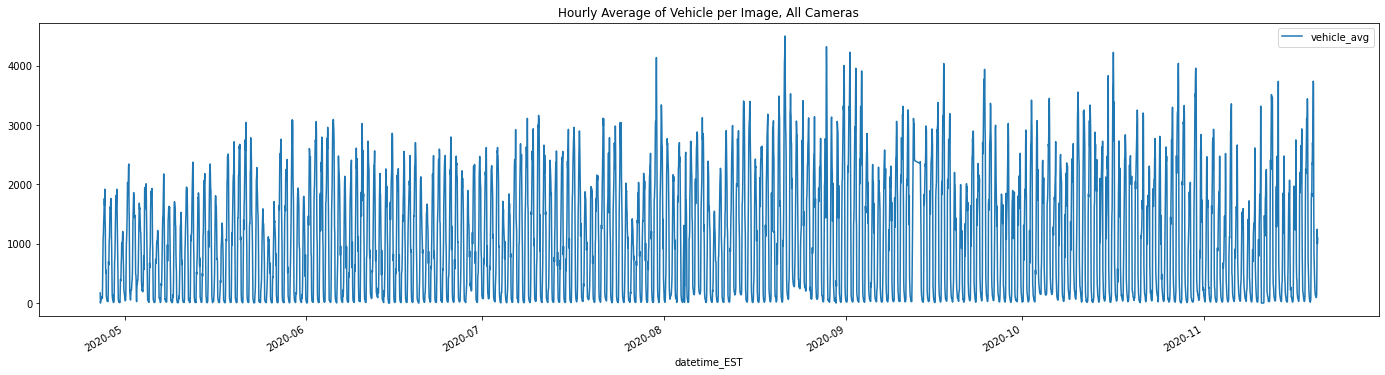

In [20]:
df_sampledh['datetime_EST'] = pd.to_datetime(df_sampledh['datetime_EST'])
df_sampledh.sort_values(by='datetime_EST')
df_sampledh.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(24,6),title="Hourly Average of Vehicle per Image, All Cameras")

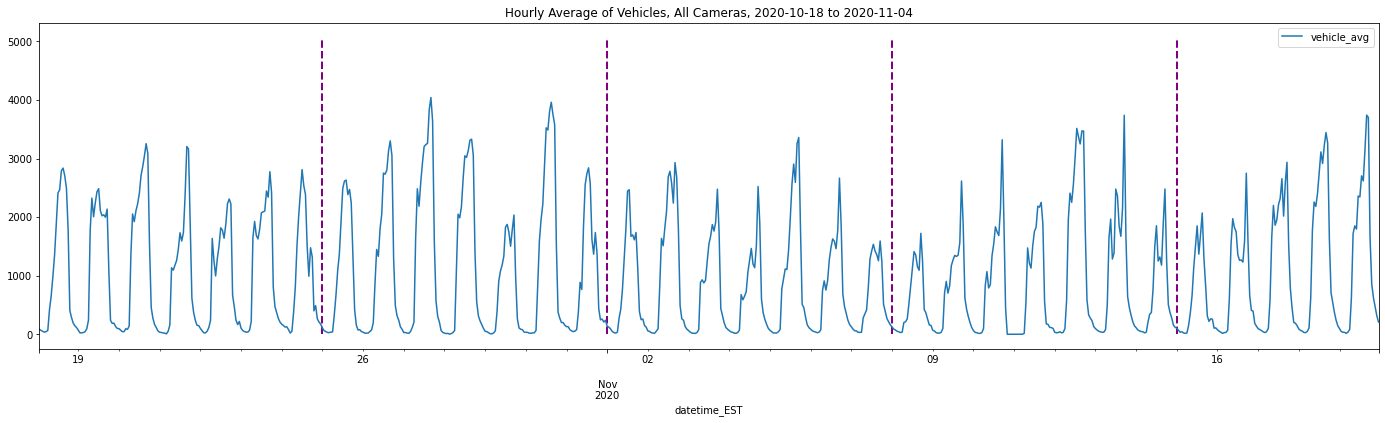

In [22]:
sds = df_sampledh[(df_sampledh['datetime_EST'] > '2020-10-18 00:00:00') & (df_sampledh['datetime_EST'] < '2020-11-20 00:00:00')]
ax = sds.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(24,6),title="Hourly Average of Vehicles, All Cameras, 2020-10-18 to 2020-11-04")
y_min = sds.vehicle_count.min()
y_max = sds.vehicle_count.max()

plt.vlines(x=['2020-10-18', '2020-10-25', '2020-11-01', '2020-11-08', '2020-11-15'], ymin=y_min, ymax=y_max, colors='purple', ls='--', lw=2, label='vline_multiple')

In [23]:
icc = ['CAM02037CCTV43',
 'CAM02038CCTV44',
 'CAM02039CCTV45',
 'CAM02040CCTV46',
 'CAM02042CCTV49',
 'parkArboretum']

ccc = ['CAM02009CCTV7',
 'CAM02001CCTV2',
 'CAM02010CCTV11',
 'CAM02005CCTV9',
 'CAM02006CCTV10',
 'CAM02028CCTV32',
 'CAM02003CCTV4',
 'CAM02020CCTV24',
 'CAM02002CCTV3',
 'CAM02007CCTV13',
 'CAM02046CCTV52',
 'CAM02033CCTV38',
 'collegeTwp']

In [24]:
concamdf = xdfn5.drop(xdfn5[(xdfn5["camera_name"].isin(icc))].index)
incamdf = xdfn5.drop(xdfn5[(xdfn5["camera_name"].isin(ccc))].index)

In [25]:
import calendar  
    
yy = 2020
    
# display the calendar  
print(calendar.month(yy, 10))  
print(calendar.month(yy, 11)) 

    October 2020
Mo Tu We Th Fr Sa Su
          1  2  3  4
 5  6  7  8  9 10 11
12 13 14 15 16 17 18
19 20 21 22 23 24 25
26 27 28 29 30 31

   November 2020
Mo Tu We Th Fr Sa Su
                   1
 2  3  4  5  6  7  8
 9 10 11 12 13 14 15
16 17 18 19 20 21 22
23 24 25 26 27 28 29
30



TypeError: unhashable type: 'numpy.ndarray'

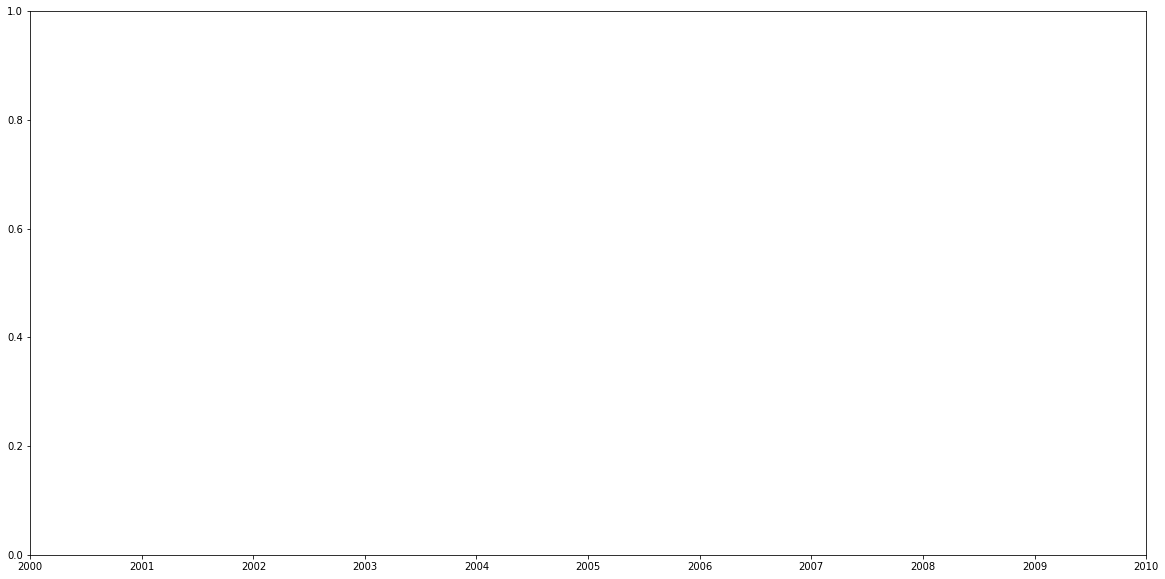

In [32]:

fig, ax = plt.subplots(figsize=(20,10))
sub = incamdf[(incamdf["datetime_EST"] > '2020-10-22') & (incamdf["datetime_EST"] < '2020-10-27') ]
#df = pd.unique(sub['Dates'])
yp = sub#.groupby('ti')['vehicle_avg'].mean()
ax.plot(sub, label='Fall Semester Weekday Hourly Average' )   

sub = incamdf[(incamdf["datetime_EST"] > '2020-10-29') & (incamdf["datetime_EST"] < '2020-11-02') ]
#df = pd.unique(sub['Dates'])
gp = sub#. #groupby('ti')['vehicle_avg'].mean()

sub = incamdf[(incamdf["datetime_EST"] > '2020-11-06') & (incamdf["datetime_EST"] < '2020-11-10') ]
#df = pd.unique(sub['Dates'])
sp = sub#.groupby('ti')['vehicle_avg'].mean()
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(sp, label='Fall Semester Weekday Hourly Average' )    
ax.plot(yp, label='Yellow Phase Weekday Hourly Average' )
ax.plot(gp, label='Green Phase Weekday Hourly Average' )
ax.plot(rp, label='Red Phase Weekday Hourly Average' )

In [35]:
sub = incamdf[(incamdf["datetime_EST"] > '2020-10-22') & (incamdf["datetime_EST"] < '2020-10-27') ]


In [36]:
sub

,datetime_UTC,image_file,vehicle_count,datetime_EST,camera_name
datetime_EST,,,,,
2020-10-22 00:00:11,2020-10-22 04:00:11,/home/ubuntu/cams33/CAM02038CCTV44/20201022/20...,0,2020-10-22 00:00:11,CAM02038CCTV44
2020-10-22 00:00:13,2020-10-22 04:00:13,/home/ubuntu/cams33/CAM02039CCTV45/20201022/20...,1,2020-10-22 00:00:13,CAM02039CCTV45
2020-10-22 00:00:15,2020-10-22 04:00:15,/home/ubuntu/cams33/CAM02040CCTV46/20201022/20...,1,2020-10-22 00:00:15,CAM02040CCTV46
2020-10-22 00:00:17,2020-10-22 04:00:17,/home/ubuntu/cams33/CAM02042CCTV49/20201022/20...,1,2020-10-22 00:00:17,CAM02042CCTV49
2020-10-22 00:00:21,2020-10-22 04:00:21,/home/ubuntu/cams33/parkArboretum/20201022/202...,0,2020-10-22 00:00:21,parkArboretum
...,...,...,...,...,...
2020-10-26 23:59:01,2020-10-27 03:59:01,/home/ubuntu/cams33/CAM02042CCTV49/20201027/20...,0,2020-10-26 23:59:01,CAM02042CCTV49
2020-10-26 23:59:31,2020-10-27 03:59:31,/home/ubuntu/cams33/CAM02037CCTV43/20201027/20...,0,2020-10-26 23:59:31,CAM02037CCTV43
2020-10-26 23:59:35,2020-10-27 03:59:35,/home/ubuntu/cams33/CAM02039CCTV45/20201027/20...,0,2020-10-26 23:59:35,CAM02039CCTV45


# Daily Peak Analysis

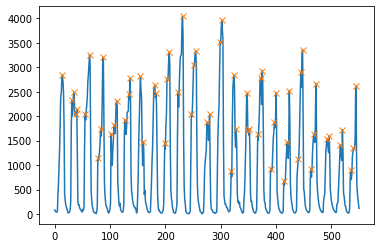

In [53]:
from scipy.signal import find_peaks
myList = list(sds.vehicle_avg)
myList = [round(x) for x in myList]
x = np.array(myList)
peaks, _ = find_peaks(x, distance=1, height=500)
plt.plot(x)

plt.plot(peaks, x[peaks], "x")

In [46]:
import numpy as np

In [77]:
df = sds.iloc[peaks]
df['Dates'] = pd.to_datetime(df['datetime_EST']).dt.date
df['Time'] = pd.to_datetime(df['datetime_EST']).dt.time
df['ti'] = df.apply (lambda row: h2i(row), axis=1)

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [79]:
df['ti'] = df.apply (lambda row: h2i(row), axis=1)

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


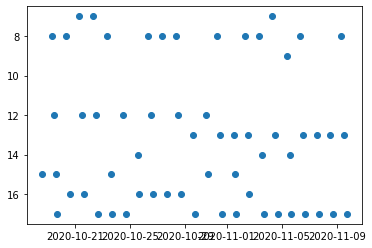

In [83]:
plt.gca().invert_yaxis()
plt.scatter(df.datetime_EST, df.ti)

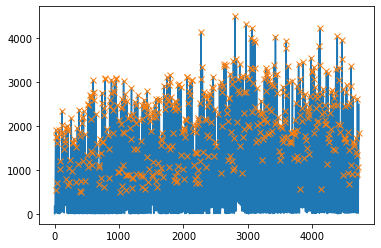

In [84]:
from scipy.signal import find_peaks
myList = list(df_sampledh.vehicle_avg)
myList = [round(x) for x in myList]
x = np.array(myList)
peaks, _ = find_peaks(x, distance=1, height=500)
plt.plot(x)

plt.plot(peaks, x[peaks], "x")

In [86]:
df = df_sampledh.iloc[peaks]
df['Dates'] = pd.to_datetime(df['datetime_EST']).dt.date
df['Time'] = pd.to_datetime(df['datetime_EST']).dt.time
df['ti'] = df.apply (lambda row: h2i(row), axis=1)

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


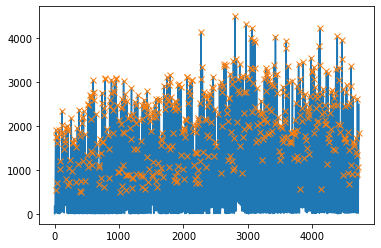

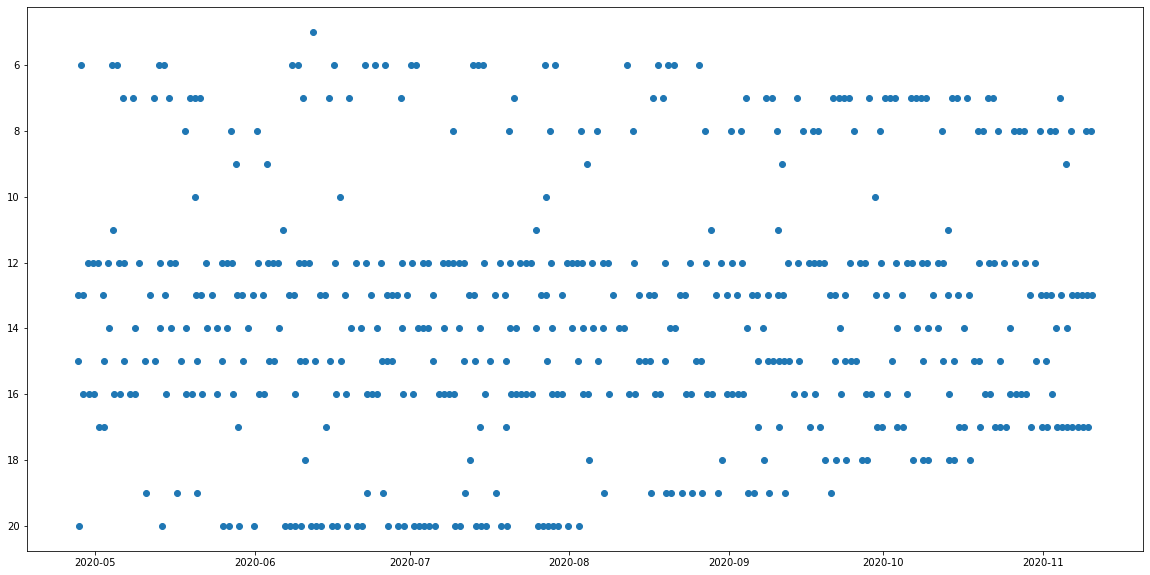

In [34]:
from scipy.signal import find_peaks
#dfc.set_index('datetime_EST', inplace=True)

df_sampledh.set_index('datetime_EST', drop=False, inplace=True)

wkdy = df_sampledh[df_sampledh.index.dayofweek < 7]
myList = list(wkdy.vehicle_avg)
myList = [round(x) for x in myList]
x = np.array(myList)
peaks, _ = find_peaks(x, distance=1, height=500)
plt.plot(x)

plt.plot(peaks, x[peaks], "x")


df = df_sampledh.iloc[peaks]

df['ti'] = df.apply (lambda row: h2i(row), axis=1)
plt.figure(figsize=(20,10)) 
plt.gca().invert_yaxis()
plt.scatter(df.datetime_EST, df.ti)

In [36]:
df_sampledh

,datetime_EST,vehicle_count,image_sum,vehicle_avg,Dates,Time,ti,dy
datetime_EST,,,,,,,,
2020-04-26 20:00:00,2020-04-26 20:00:00,144,960,171.000000,2020-04-26,20:00:00,20,6
2020-04-26 21:00:00,2020-04-26 21:00:00,0,68,0.000000,2020-04-26,21:00:00,21,6
2020-04-26 22:00:00,2020-04-26 22:00:00,11,516,24.302326,2020-04-26,22:00:00,22,6
2020-04-26 23:00:00,2020-04-26 23:00:00,38,794,54.559194,2020-04-26,23:00:00,23,6
2020-04-27 00:00:00,2020-04-27 00:00:00,77,796,110.276382,2020-04-27,00:00:00,0,0
...,...,...,...,...,...,...,...,...
2020-11-10 12:00:00,2020-11-10 12:00:00,1880,1390,1541.870504,2020-11-10,12:00:00,12,1
2020-11-10 13:00:00,2020-11-10 13:00:00,2289,1422,1835.063291,2020-11-10,13:00:00,13,1
2020-11-10 14:00:00,2020-11-10 14:00:00,2195,1431,1748.637317,2020-11-10,14:00:00,14,1


# Daily Traffic Analysis, by Phase and Month

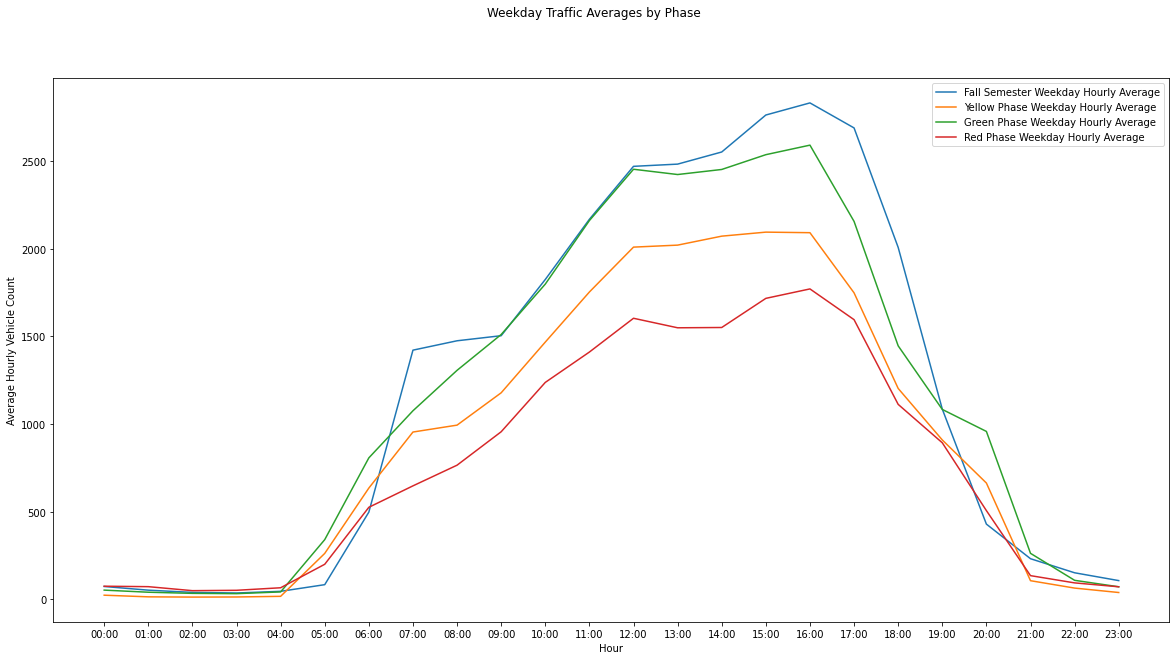

In [74]:

sub = df_sampledh[(df_sampledh["datetime_EST"] < '2020-05-08') & (df_sampledh["dy"] < 5)]
df = pd.unique(sub['Dates'])
rp = sub.groupby('ti')['vehicle_avg'].mean()

sub = df_sampledh[(df_sampledh["datetime_EST"] > '2020-05-07') & (df_sampledh["datetime_EST"] < '2020-05-29') & (df_sampledh["dy"] < 5)]
df = pd.unique(sub['Dates'])
yp = sub.groupby('ti')['vehicle_avg'].mean()

sub = df_sampledh[(df_sampledh["datetime_EST"] > '2020-05-28') & (df_sampledh["datetime_EST"] < '2020-08-17') & (df_sampledh["dy"] < 5)]
df = pd.unique(sub['Dates'])
gp = sub.groupby('ti')['vehicle_avg'].mean()

sub = df_sampledh[(df_sampledh["datetime_EST"] > '2020-08-17') & (df_sampledh["datetime_EST"] < '2020-11-10') & (df_sampledh["dy"] < 5)]
df = pd.unique(sub['Dates'])
sp = sub.groupby('ti')['vehicle_avg'].mean()
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(sp, label='Fall Semester Weekday Hourly Average' )    
ax.plot(yp, label='Yellow Phase Weekday Hourly Average' )
ax.plot(gp, label='Green Phase Weekday Hourly Average' )
ax.plot(rp, label='Red Phase Weekday Hourly Average' )

ax.set_xticks(range(0,24))
ax.set_xticklabels(["00:00","01:00","02:00","03:00","04:00","05:00","06:00","07:00","08:00",
                   "09:00","10:00","11:00","12:00","13:00","14:00","15:00","16:00","17:00",
                   "18:00","19:00","20:00","21:00","22:00","23:00"])

ax.set_ylabel("Average Hourly Vehicle Count")
ax.set_xlabel("Hour")
fig.suptitle("Weekday Traffic Averages by Phase")
# Plot the legend
plt.legend()

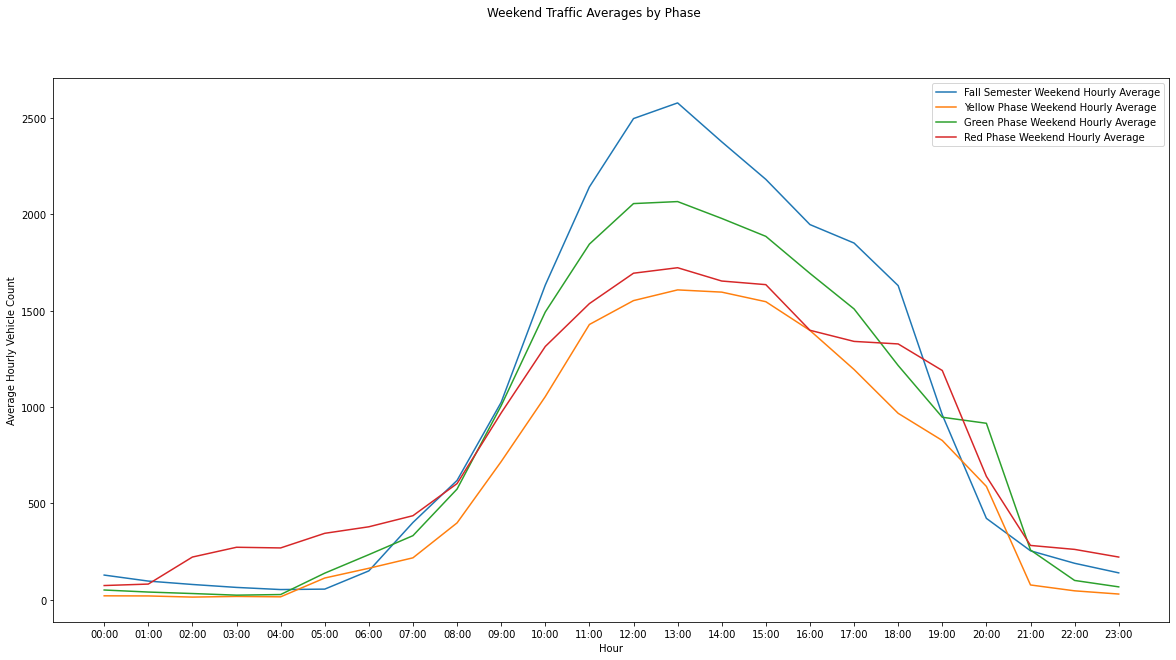

In [75]:

sub = df_sampledh[(df_sampledh["datetime_EST"] < '2020-05-08') & (df_sampledh["dy"] > 4)]
df = pd.unique(sub['Dates'])
rp = sub.groupby('ti')['vehicle_avg'].mean()

sub = df_sampledh[(df_sampledh["datetime_EST"] > '2020-05-07') & (df_sampledh["datetime_EST"] < '2020-05-29') & (df_sampledh["dy"] > 4)]
df = pd.unique(sub['Dates'])
yp = sub.groupby('ti')['vehicle_avg'].mean()

sub = df_sampledh[(df_sampledh["datetime_EST"] > '2020-05-28') & (df_sampledh["datetime_EST"] < '2020-08-17') & (df_sampledh["dy"] > 4)]
df = pd.unique(sub['Dates'])
gp = sub.groupby('ti')['vehicle_avg'].mean()

sub = df_sampledh[(df_sampledh["datetime_EST"] > '2020-08-17') & (df_sampledh["datetime_EST"] < '2020-11-10') & (df_sampledh["dy"] > 4)]
df = pd.unique(sub['Dates'])
sp = sub.groupby('ti')['vehicle_avg'].mean()
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(sp, label='Fall Semester Weekend Hourly Average' )    
ax.plot(yp, label='Yellow Phase Weekend Hourly Average' )
ax.plot(gp, label='Green Phase Weekend Hourly Average' )
ax.plot(rp, label='Red Phase Weekend Hourly Average' )

ax.set_xticks(range(0,24))
ax.set_xticklabels(["00:00","01:00","02:00","03:00","04:00","05:00","06:00","07:00","08:00",
                   "09:00","10:00","11:00","12:00","13:00","14:00","15:00","16:00","17:00",
                   "18:00","19:00","20:00","21:00","22:00","23:00"])

ax.set_ylabel("Average Hourly Vehicle Count")
ax.set_xlabel("Hour")
fig.suptitle("Weekend Traffic Averages by Phase")
# Plot the legend
plt.legend()

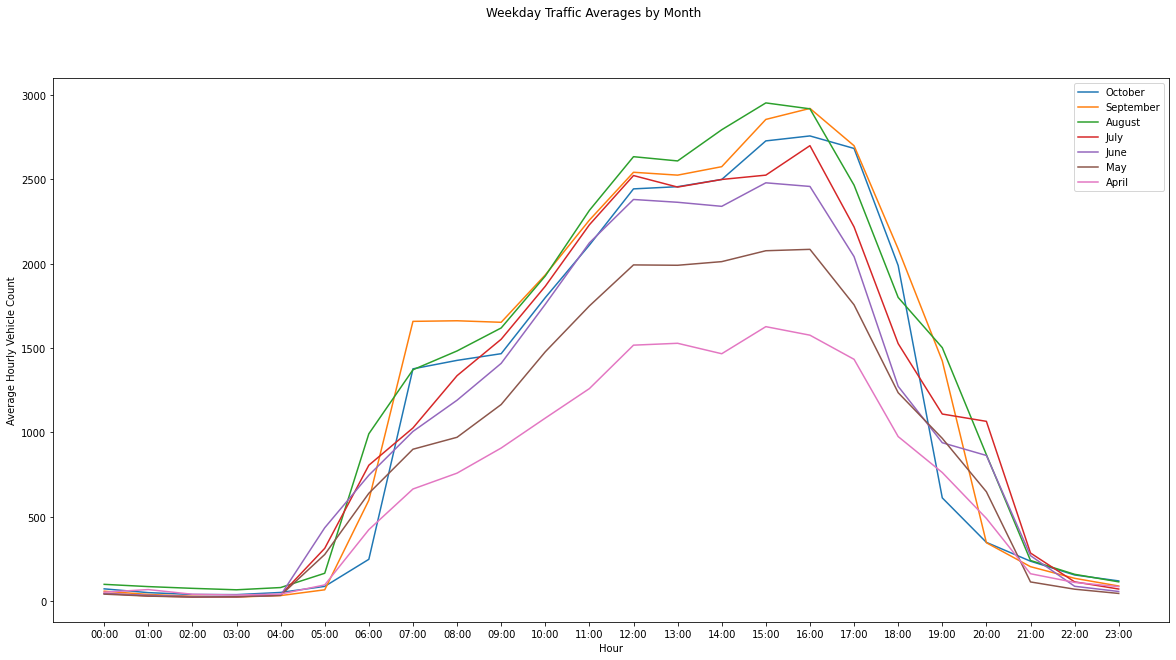

In [79]:

sub = df_sampledh[(df_sampledh["datetime_EST"] < '2020-05-01') & (df_sampledh["dy"] < 5)]
df = pd.unique(sub['Dates'])
april = sub.groupby('ti')['vehicle_avg'].mean()

sub = df_sampledh[(df_sampledh["datetime_EST"] >= '2020-05-01') & (df_sampledh["datetime_EST"] < '2020-06-01') & (df_sampledh["dy"] < 5)]
df = pd.unique(sub['Dates'])
may = sub.groupby('ti')['vehicle_avg'].mean()

sub = df_sampledh[(df_sampledh["datetime_EST"] >= '2020-06-01') & (df_sampledh["datetime_EST"] < '2020-07-01') & (df_sampledh["dy"] < 5)]
df = pd.unique(sub['Dates'])
june = sub.groupby('ti')['vehicle_avg'].mean()

sub = df_sampledh[(df_sampledh["datetime_EST"] >= '2020-07-01') & (df_sampledh["datetime_EST"] < '2020-08-01') & (df_sampledh["dy"] < 5)]
df = pd.unique(sub['Dates'])
july = sub.groupby('ti')['vehicle_avg'].mean()

sub = df_sampledh[(df_sampledh["datetime_EST"] >= '2020-08-01') & (df_sampledh["datetime_EST"] < '2020-09-01') & (df_sampledh["dy"] < 5)]
df = pd.unique(sub['Dates'])
august = sub.groupby('ti')['vehicle_avg'].mean()

sub = df_sampledh[(df_sampledh["datetime_EST"] >= '2020-09-01') & (df_sampledh["datetime_EST"] < '2020-10-01') & (df_sampledh["dy"] < 5)]
df = pd.unique(sub['Dates'])
sept = sub.groupby('ti')['vehicle_avg'].mean()

sub = df_sampledh[(df_sampledh["datetime_EST"] >= '2020-10-01') & (df_sampledh["datetime_EST"] < '2020-11-01') & (df_sampledh["dy"] < 5)]
df = pd.unique(sub['Dates'])
oct = sub.groupby('ti')['vehicle_avg'].mean()

fig, ax = plt.subplots(figsize=(20,10))

 
ax.plot(oct, label='October' )  
ax.plot(sept, label='September' )  
ax.plot(august, label='August' )  
ax.plot(july, label='July' )    
ax.plot(june, label='June' )
ax.plot(may, label='May' )
ax.plot(april, label='April' )

ax.set_xticks(range(0,24))
ax.set_xticklabels(["00:00","01:00","02:00","03:00","04:00","05:00","06:00","07:00","08:00",
                   "09:00","10:00","11:00","12:00","13:00","14:00","15:00","16:00","17:00",
                   "18:00","19:00","20:00","21:00","22:00","23:00"])

ax.set_ylabel("Average Hourly Vehicle Count")
ax.set_xlabel("Hour")
fig.suptitle("Weekday Traffic Averages by Month")
# Plot the legend
plt.legend()